#                                          CASE STUDY-1

#                                         Level 0 analysis

Importing the necessary libraries & finding the basic info about them. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df=pd.read_csv('DS1_C5_S3_BazilHousing_Data_Hackathon.csv')
df[:10]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
5,São Paulo,376,3,3,7,0,acept,not furnished,0,8000,834,121,8955
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750
7,São Paulo,213,4,4,4,4,acept,not furnished,2254,3223,1735,41,7253
8,São Paulo,152,2,2,1,3,acept,furnished,1000,15000,250,191,16440
9,Rio de Janeiro,35,1,1,0,2,acept,furnished,590,2300,35,30,2955


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  int64 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [6]:
df.describe()

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,5.067995,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,6.069050,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,3.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,8.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,301.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [7]:
df.nunique()

city                      5
area                    517
rooms                    11
bathroom                 10
parking spaces           11
floor                    35
animal                    2
furniture                 2
hoa (R$)               1679
rent amount (R$)       1195
property tax (R$)      1243
fire insurance (R$)     216
total (R$)             5751
dtype: int64

   LEVEL 0 CONCLUSION = From the above outputs , it can be concluded that there are no null values ,It consists of  12 columns
                        out of which 3 are categorical datas and others are numerical. 


OBJECTIVE : find the suitable city for bachelors, small families & large families that also serves as an alternative to 
             rio de jenerio && sao paulo.

creating many sub questions for better understanding.

#                                     Level 1 analysis (UNIVARIANT)

 Basic Requirements for bachelors, small fam, large fam

bachelors= room <=2, bathroom=1,parking space= 1 or 0, min rent, floor =0
small fam= room<=3, bathroom <=3,parking space<2,floor<=2
large family = room >3, bathroom>3,parking space >2, floor>3

In [3]:
# removing thhe 2 cstlier cities using conditonal statements
data=df[(df.city!="São Paulo")&(df.city!="Rio de Janeiro")]
data

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
11,Campinas,46,1,1,1,10,acept,not furnished,550,580,43,8,1181
15,Campinas,330,4,6,6,0,acept,furnished,680,8000,328,121,9129
21,Belo Horizonte,42,1,1,1,17,not acept,furnished,470,2690,172,36,3368
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10667,Belo Horizonte,75,2,1,1,3,not acept,not furnished,180,1250,0,17,1447
10673,Porto Alegre,220,3,2,2,15,acept,not furnished,842,2400,117,36,3395
10676,Porto Alegre,40,1,1,0,1,acept,not furnished,330,1200,159,18,1707
10682,Porto Alegre,160,3,2,3,4,acept,furnished,850,3300,220,49,4419


In [4]:
# filtering the cooditions and saving each in seperate dataframe
bach=data[(data.rooms<=2)&(data.bathroom==1)&(data['parking spaces']<=1)&(data.floor==0)].
            sort_values(by='rent amount (R$)',ascending=True)
sf=data[(data.rooms<=3)&(data.bathroom<=3)&(data['parking spaces']<=2)&(data.floor<=2)]
lf=data[(data.rooms>3)&(data.bathroom>3)&(data['parking spaces']>3)&(data.floor>3)]


QUESTION:- Analyze the distribution of rent amounts for all 3 family types.

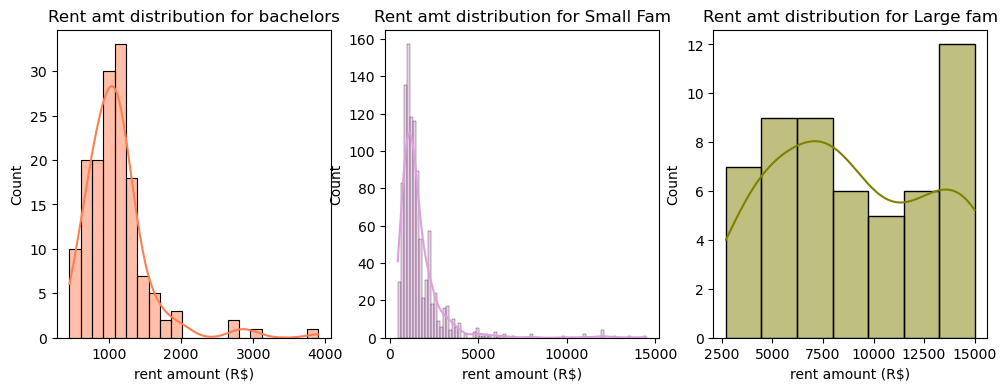

In [44]:
plt.figure(figsize=(12,4))
plt.subplot(131)
sb.histplot(data=bach,x="rent amount (R$)",kde= True,color="coral")
plt.title('Rent amt distribution for bachelors')
plt.subplot(132)
sb.histplot(data=sf,x="rent amount (R$)",kde= True,color='plum')
plt.title('Rent amt distribution for Small Fam')


plt.subplot(133)
sb.histplot(data=lf,x="rent amount (R$)",kde= True,color='olive')
plt.title('Rent amt distribution for Large fam')
plt.show()


In [ ]:
#INTERPRETATION = For bachelors it was found that the highest rent amount distrbution is between 800-1000
#                 For small fam the highest count of rent amount distribution was btwn the range 2000- 2500
#                 For large fam the highest rent amount distribution is between the range 13000 to 15000

QUESTION :- Compare the distribution of count of houses in each city for all 3 family types.

Text(0.5, 1.0, 'city for large fam')

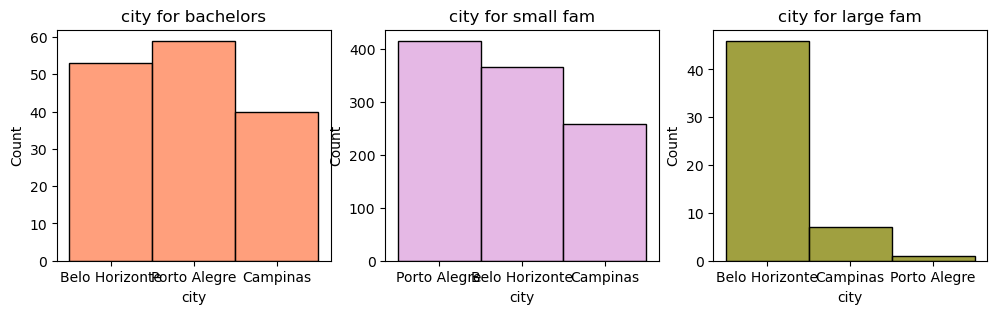

In [38]:
plt.figure(figsize=(12,3))
plt.subplot(131)
sb.histplot(data=bach["city"],fill=True,color='coral')
plt.title("city for bachelors")
plt.subplot(132)
sb.histplot(data=sf["city"],fill=True,color='plum')
plt.title("city for small fam")
plt.subplot(133)
sb.histplot(data=lf["city"],fill=True,color='olive')
plt.title("city for large fam")

In [ ]:
# INTERPRETATION= It can be found out that the city having highest num of houses each fam type are
#                  bachelors = poerto alegre.
#                  small fam = poerto alegre.
#                  large fam = Belo Horizonte.

#   Level 2 analysis ( BIVARIANT )


   QUESTION:- People of large fam want to know the best city where pets are allowed, help to find out .

<Axes: xlabel='count', ylabel='city'>

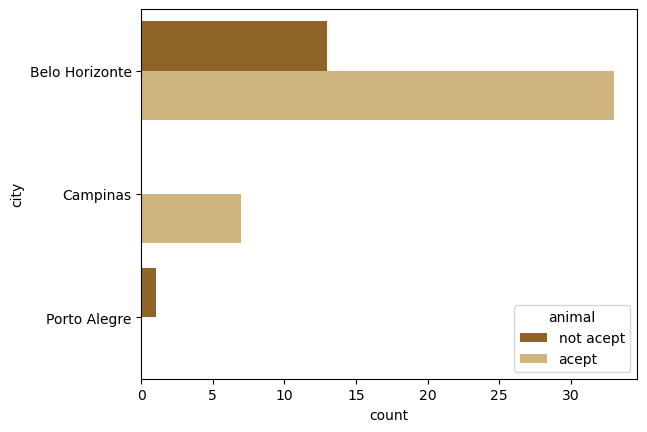

In [41]:
sb.set_palette("BrBG")
sb.countplot(y='city',hue='animal',data=lf)

In [42]:
#INTERPRETATION=  People with large fam can select belo horizonte as it has high count of pet acceptance

QUESTION:- which city would be most suitable for small families with furnished furnitures?

<Axes: xlabel='count', ylabel='city'>

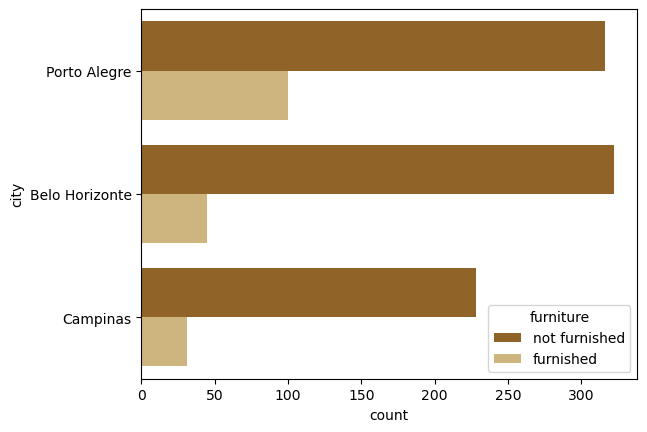

In [66]:
sb.countplot(y='city',hue='furniture',data=sf)

In [56]:
#INTERPRETATION = Porto alegre has most furnished houses that would be suitable for small families.


QUESTION :-Examine the correlation between area and rent amount for bachelors. 

In [74]:
Q1 = data['area'].quantile(0.25)                          # removing outliers for easy analysis
Q3 = data['area'].quantile(0.75)
IQR = Q3 - Q1

lf = Q1 - 1.5 * IQR
uf = Q3 + 1.5 * IQR

df_no_outliers = data[(data['area'] >= lf) & (data['area'] <= uf)]

# Print the number of rows removed
num_removed = len(data) - len(df_no_outliers)
print(f'Number of outliers removed: {num_removed}')


Number of outliers removed: 295


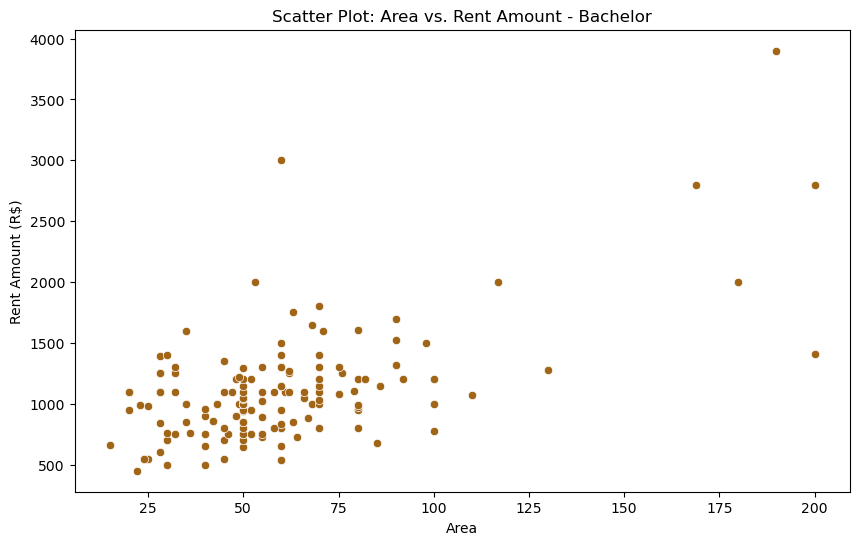

In [84]:
plt.figure(figsize=(10, 6))
sb.scatterplot(x='area', y='rent amount (R$)', data=bach)
plt.title('Scatter Plot: Area vs. Rent Amount - Bachelor')
plt.xlabel('Area')
plt.ylabel('Rent Amount (R$)')
plt.show()


In [ ]:
#INTERPRETATION :-     For bachelors lots of houses are present of the area between 25 to 80 sq ft
#                                and the rent amount is below 1500$.

# Level 3 analysis ( MULTIVARIANT )

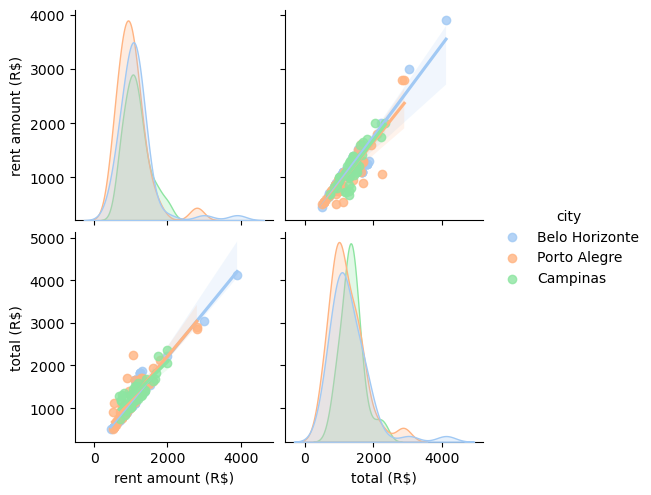

In [97]:
sb.set_palette("pastel")
sb.pairplot(bach,hue='city',vars=['rent amount (R$)','total (R$)'],kind='reg',diag_kind='kde')



In [ ]:
#INTERPRETATION = For bachelors it can be found that campinas has lowest rent as well as total amount &
#                  and belo horizonte has the highest rent as well as total amount.          

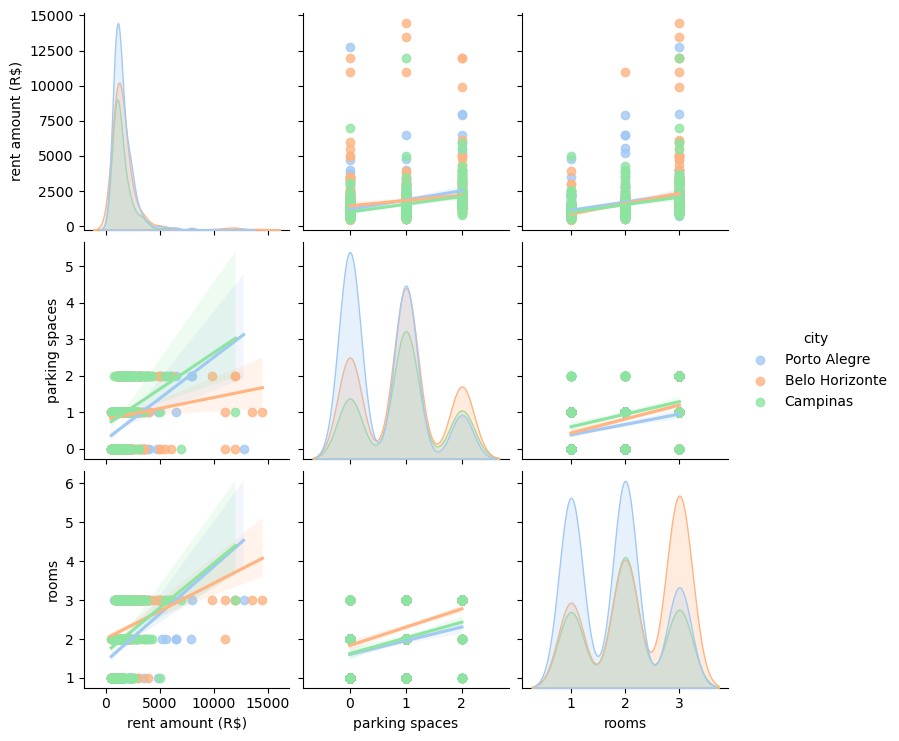

In [101]:
sb.pairplot(sf,hue='city',vars=['rent amount (R$)','parking spaces','rooms'],kind='reg',diag_kind='kde')

In [ ]:
#INTERPRETATION :- Porto alegre has highest rent but at the same time has most of the amenities 
#                   campinas has lowest rent but not much facilities are available that are need for small families.

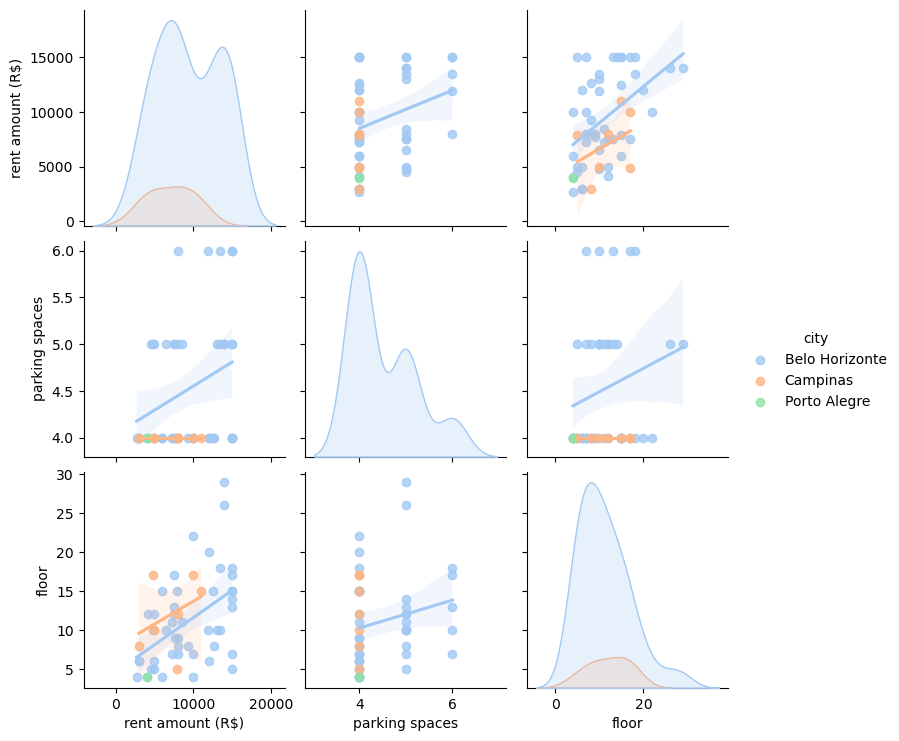

In [105]:
sb.pairplot(lf,hue='city',vars=['rent amount (R$)','parking spaces','floor'],kind='reg',diag_kind='kde')

In [ ]:
#INTERPRETATION :- It can be clearly seen bela horizonte has highest num of amenities 
#                  campinas has the lowest.

Analyse the correlation between all numerical datas

C:\Users\91956\AppData\Local\Temp\ipykernel_9152\2046869206.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


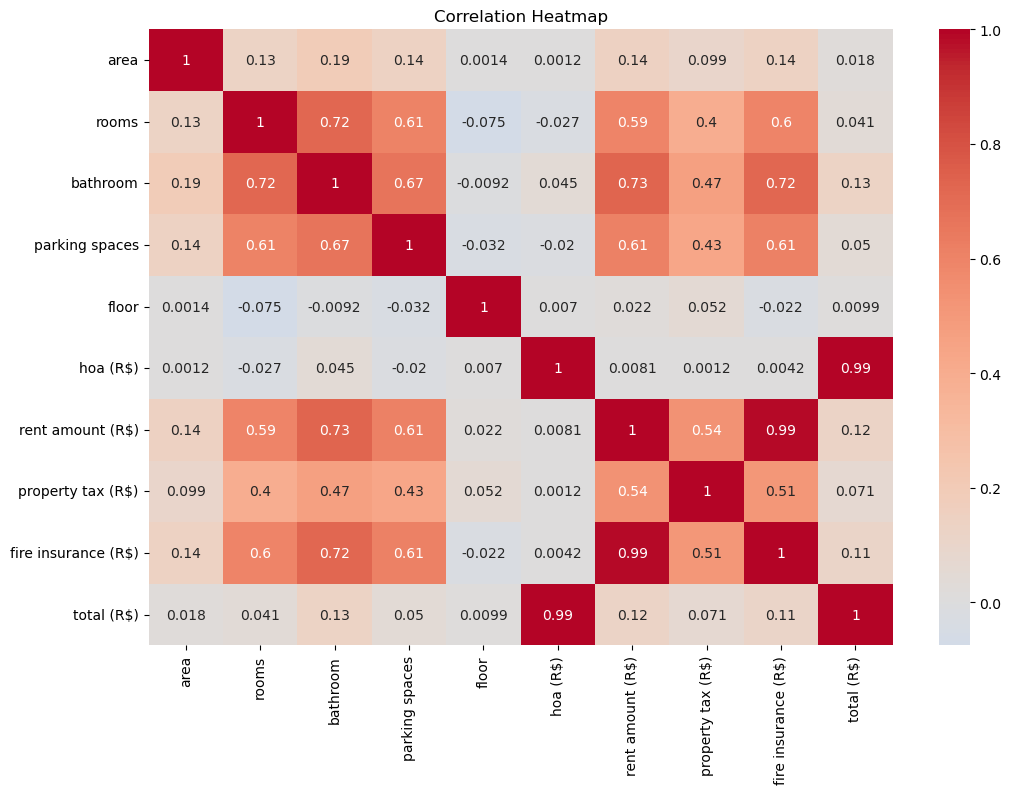

In [6]:
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
#INTERPRETATION :- It can be found out that the very strong positive correlation exist between hoa & total cost as well as
#                         between fire insurance and rent.
#                  It can be found out that a very strong negativecorrelation exist between room & floor, parking space & floor.                   

OVERALL INTERPRETATION 

For bachelors the best city would be campinas, as it has lowest rent.
for small families best city would be porto alegre which has goood amount of rooms, insurance & rent.
for large families best city would be bela horizonte as it has highest num of facilities, including large amt of floors , plenty of parking space and acceptance of pet animals .
